# **Medical Cost Prediction**

The purpose of this analysis is to estimate medical costs based on patient data. The Insurance dataset from Kaggle was the source of the data for this investigation. 1338 observations and 7 variables make up the dataset.

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Data Preprocessing**

In [ ]:
#number of rows and columns
df.shape

(1338, 7)

In [ ]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#checking discriptive statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#value counts for categorical data
print(df.sex.value_counts(),'\n',df.smoker.value_counts(),'\n',df.region.value_counts())

male      676
female    662
Name: sex, dtype: int64 
 no     1064
yes     274
Name: smoker, dtype: int64 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


Replacing the categorical data with numerical values:



1.   sex : 1 - male, 0 - female
2.   smoker : 1 - yes, 0 - no
3.   regions to categorical value (0,1,2,3)






In [ ]:
# converting 'sex' categorical value to numerical value
pd.get_dummies(df['sex'])

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [ ]:
df[['female','male']]=pd.get_dummies(df['sex'])
df.head()

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [ ]:
df=df.drop(['female'],axis=1)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


'Sex' categorical value was successfully transformed to a numeric value.

In [ ]:
# converting 'smoker' categorical value to numeric value
pd.get_dummies(df['smoker'])

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [ ]:
df[['Not_Smoking','Smoking']]=pd.get_dummies(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Not_Smoking,Smoking
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,1,0


In [ ]:
df=df.drop(['Not_Smoking'],axis=1)

In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges,male,Smoking
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
5,31,female,25.740,0,no,southeast,3756.62160,0,0
6,46,female,33.440,1,no,southeast,8240.58960,0,0
7,37,female,27.740,3,no,northwest,7281.50560,0,0
8,37,male,29.830,2,no,northeast,6406.41070,1,0
9,60,female,25.840,0,no,northwest,28923.13692,0,0


'smoker' categorical value was successfully transformed to a numeric value.

# ***Exploratory Data Analysis***

Data visualisation is a useful tool for comprehension. To gain a general idea of the counts and distributions of each variable, I shall plot their distributions in this section.

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoking
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


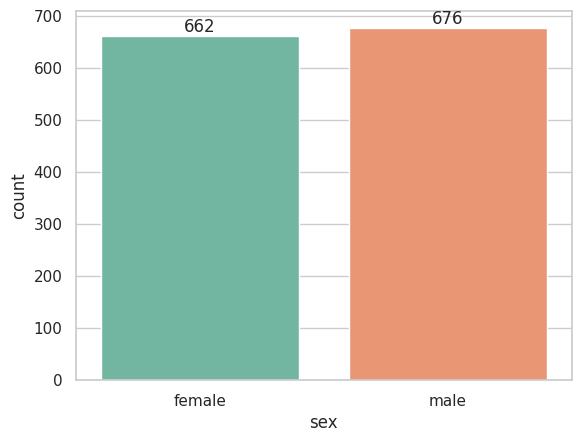

In [ ]:
ax=sns.countplot(x='sex',data=df,palette = "Set2")

for bar in ax.containers:
  ax.bar_label(bar)


There are around 662 Females and 676 Males in the datase.

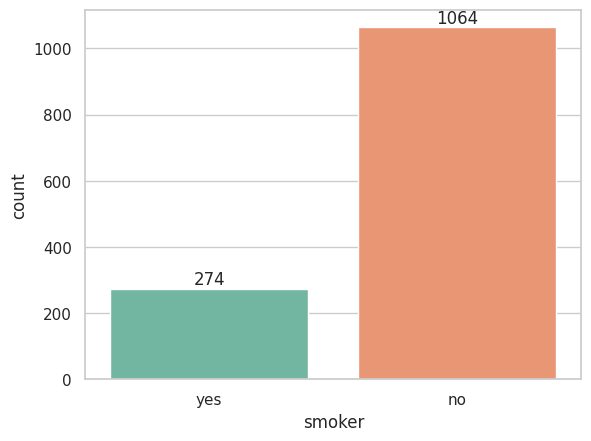

In [ ]:
ax=sns.countplot(x='smoker',data=df,palette = "Set2")

for bar in ax.containers:
  ax.bar_label(bar)


There are around 274 Smokers and 1064 Non-Smokers in the dataset

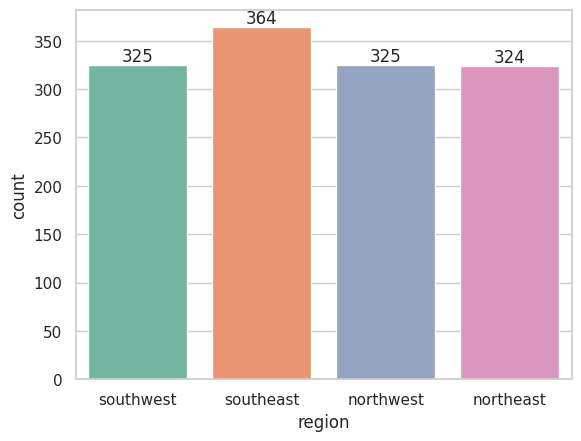

In [ ]:
ax=sns.countplot(x='region',data=df,palette = "Set2")

for bar in ax.containers:
  ax.bar_label(bar)

In [ ]:
px.histogram(df, x="sex",color="smoker")

Distribution of smoker and non smoker on basis of sex

In [ ]:
px.histogram(df, x="region",color="smoker")


Distribution of smoker and non smoker on basis of region

In [ ]:
px.histogram(df, x="sex",color="region",barmode="group")

<Axes: xlabel='sex', ylabel='charges'>

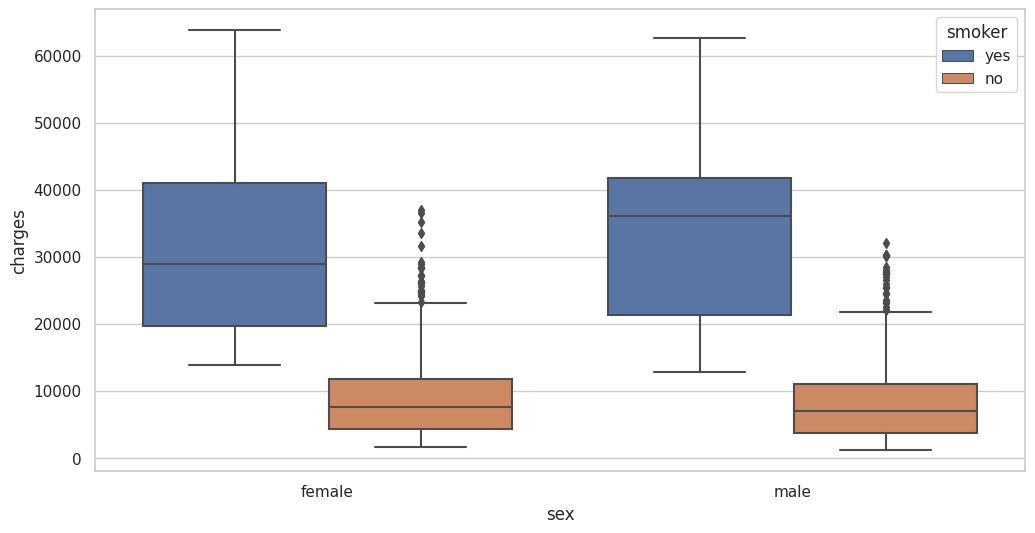

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='sex',y='charges',data=df,hue='smoker')

From here we can say that charges for smokers are more than that of non smokers

In [ ]:
px.scatter(df, x="age", y="charges", color="sex")

As **Age** increses **Charges** increases.

Now, we clearly understand the variation in charges with respect to age and smoking habits. The medical expense of smokers is higher than that of non-smokers. In non-smokers, the cost of treatment increases with age which is obvious. But in smokers, the cost of treatment is high even for younger patients, which means the smoking patients are spending upon their smoking related illness as well as age related illness.

In [ ]:
px.scatter(df, x="age", y="charges", color="smoker")

The insurance cost of smokers in **2-3x** of non-smokers.
Most of non-smokers have charges from **0 to 15k**.

In [ ]:
px.scatter(df, x="age", y="charges", color="region")

<Axes: xlabel='bmi', ylabel='charges'>

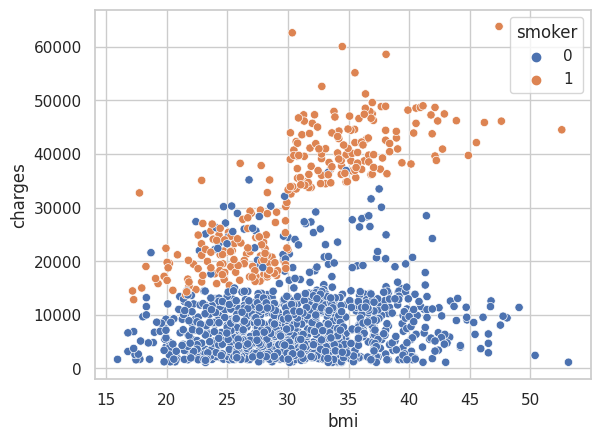

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'smoker')

Non smokers with high bmi have less charges as compared to smkokers with a good bmi  

In [ ]:
px.scatter(df,x='bmi',y='age',color='smoker')

In [ ]:
px.ecdf(df, x="charges", color="sex")

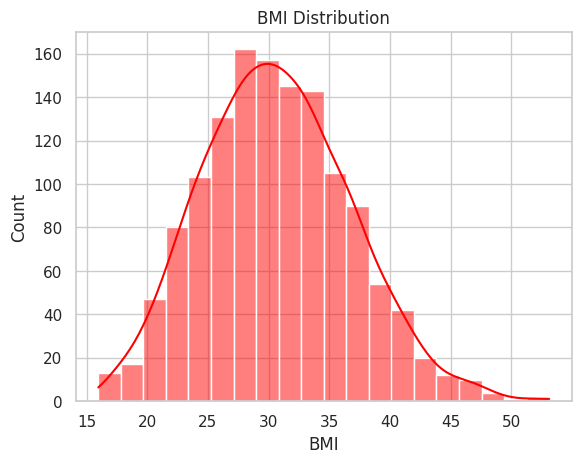

In [ ]:
sns.histplot(df.bmi,bins=20, kde=True,color='red')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

The majority of the patients have BMI between 25 and 40 which is considered as overweight and could be a major factor in increasing the medical cost.

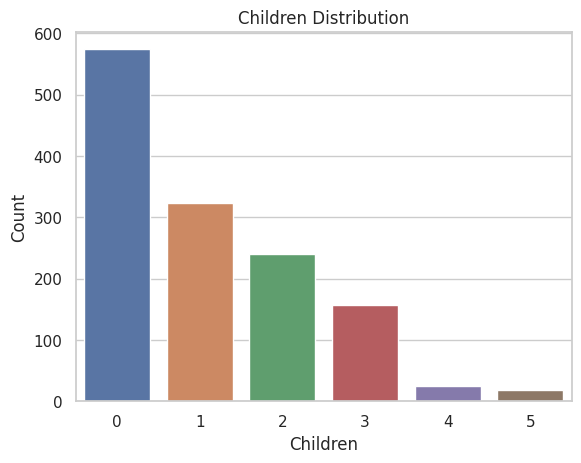

In [ ]:
sns.countplot(x = 'children', data = df,)
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

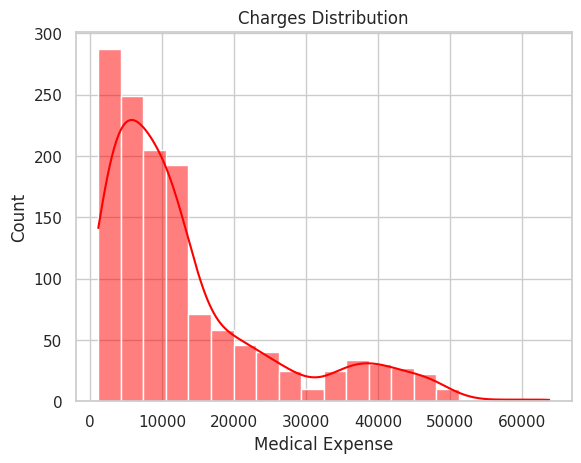

In [ ]:
#charges distribution
sns.histplot(df.charges,bins=20, kde=True,color='red')
plt.title('Charges Distribution')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

Most of the medical expenses are below 20000, with negligible number of patients having medical expenses above 50000.

From all the above plots, we have a clear understanding about the count of patients under each category of the variables. Now I will look into the coorelation between the variables.

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoking
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['region']= label_encoder.fit_transform(df['region'])
df.head(10)

,age,sex,bmi,children,smoker,region,charges,male,Smoking
0,19,female,27.900,0,yes,3,16884.92400,0,1
1,18,male,33.770,1,no,2,1725.55230,1,0
2,28,male,33.000,3,no,2,4449.46200,1,0
3,33,male,22.705,0,no,1,21984.47061,1,0
4,32,male,28.880,0,no,1,3866.85520,1,0
5,31,female,25.740,0,no,2,3756.62160,0,0
6,46,female,33.440,1,no,2,8240.58960,0,0
7,37,female,27.740,3,no,1,7281.50560,0,0
8,37,male,29.830,2,no,0,6406.41070,1,0
9,60,female,25.840,0,no,1,28923.13692,0,0


Using label encoding converted region from categorical value to numeric value

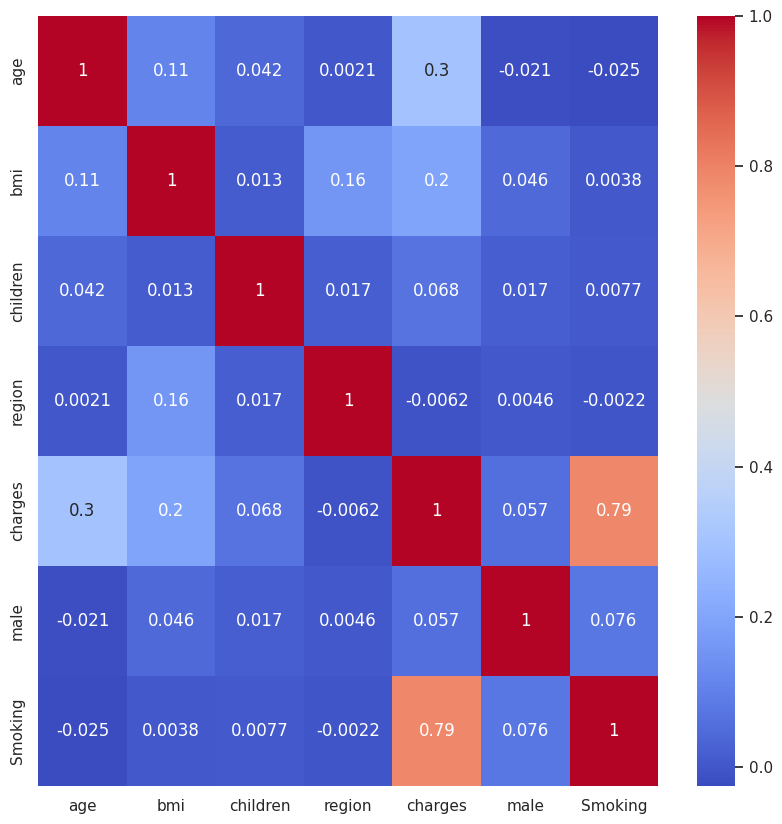

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

The variable smoker shows a significant coorelation with the medical expenses. Now I will explore more into patients' smoking habits and their relationa with other factors.

In [ ]:
px.violin(df,x='sex',y='charges')

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

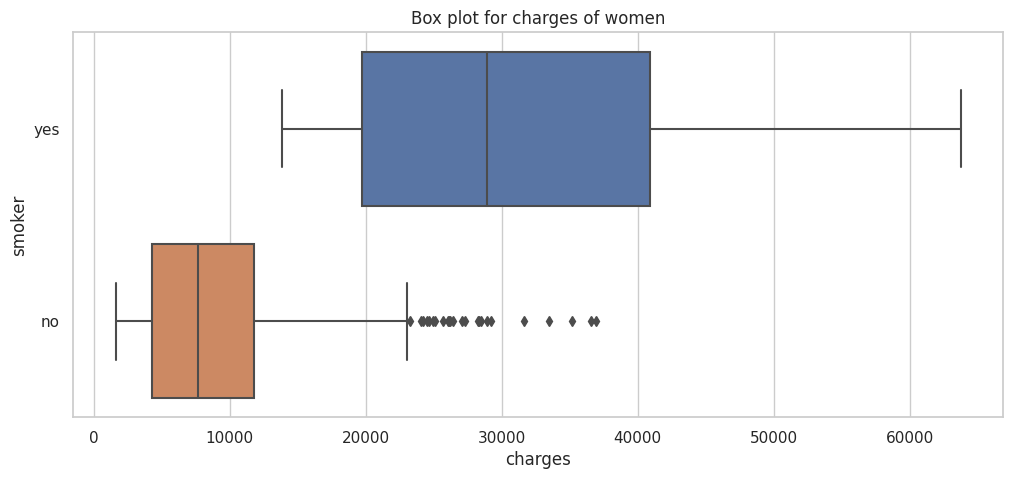

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 'female')] , orient="h")

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

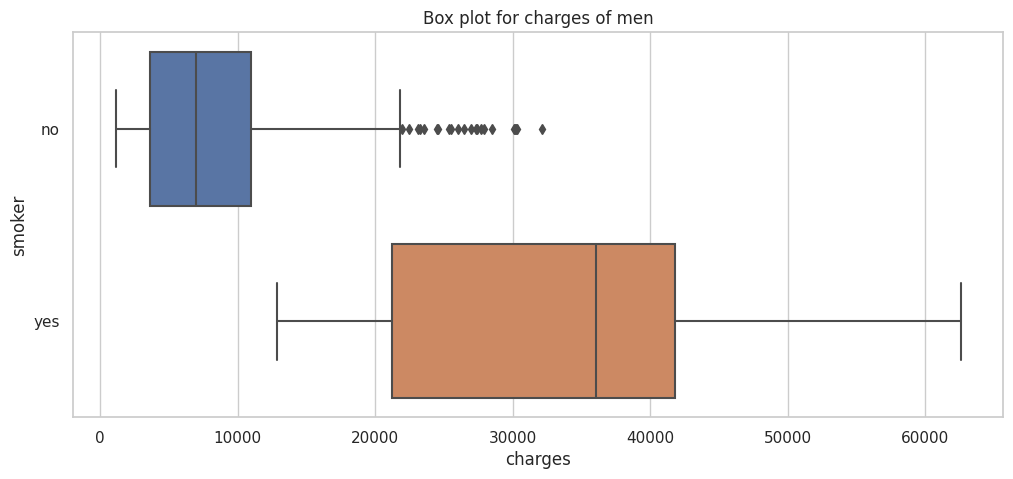

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 'male')] , orient="h")

# **Smoke and Age distribution**

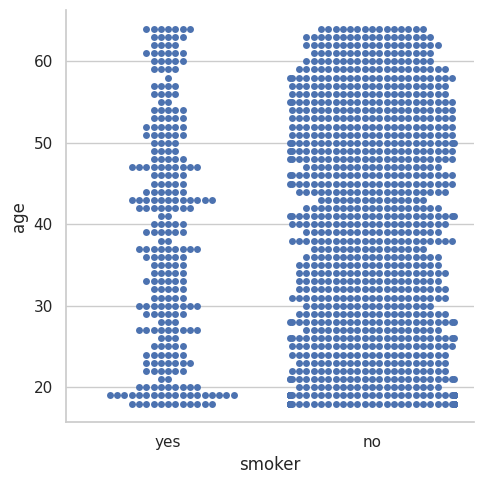

In [ ]:
#smokers and age distribution
sns.catplot(x="smoker", y="age", kind="swarm", data=df)

From the graph, we can see that there significant number of smokers of age 19. Now I will study the medical expense of smokers of age 19.

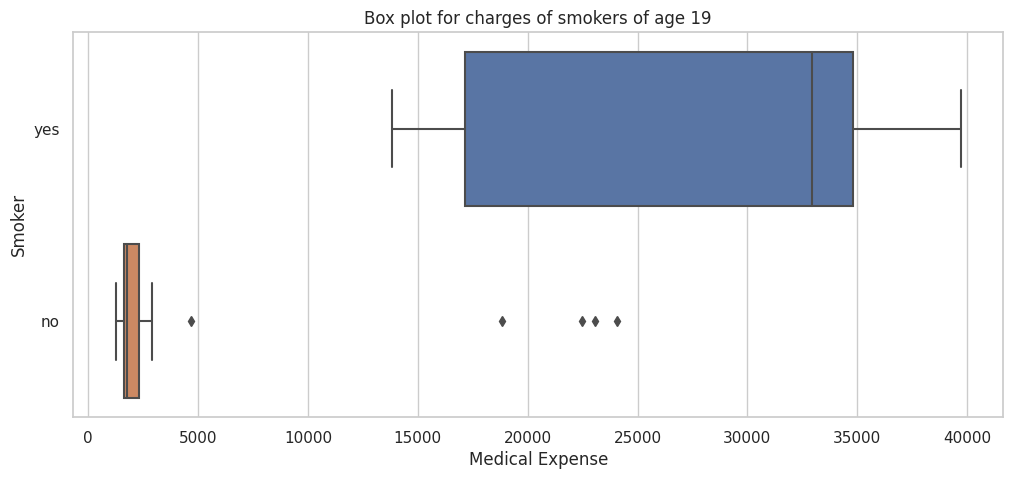

In [ ]:
#smokers of age 19
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers of age 19")
sns.boxplot(y="smoker", x="charges", data =  df[(df.age == 19)] , orient="h")
plt.xlabel('Medical Expense')
plt.ylabel('Smoker')
plt.show()

Surprisingly the medical expense of smokers of age 19 is very high in comparison to non smokers. In non smokers we can see some outliners, which may be due to illness or accidents.

It is clear that the medical expense of smokers is higher than that of non-smokers. Now I will plot the charges distribution with repect to patients age of smokers and non-smokers.

Medical expenses of smokers is 3x times that of non-smokers.

# **Charges distribution for patients with BMI less than 30 i.e. healthy patients**

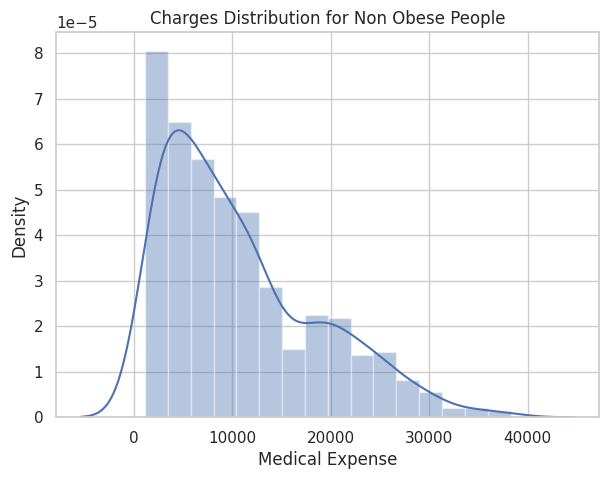

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

Therefore, patients with BMI less than 30 are spending less on medical treatment than those with BMI greater than 30.

Through the EDA, we have a clear understanding about the data and the coorelation between the variables. Now, I will build a model to predict the medical expense of patients.

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoking
0,19,female,27.900,0,yes,3,16884.92400,0,1
1,18,male,33.770,1,no,2,1725.55230,1,0
2,28,male,33.000,3,no,2,4449.46200,1,0
3,33,male,22.705,0,no,1,21984.47061,1,0
4,32,male,28.880,0,no,1,3866.85520,1,0


In [ ]:
df=df.drop(['sex'],axis=1)

In [ ]:
df.head()

,age,bmi,children,smoker,region,charges,male,Smoking
0,19,27.900,0,yes,3,16884.92400,0,1
1,18,33.770,1,no,2,1725.55230,1,0
2,28,33.000,3,no,2,4449.46200,1,0
3,33,22.705,0,no,1,21984.47061,1,0
4,32,28.880,0,no,1,3866.85520,1,0


In [ ]:
df=df.drop(['smoker'],axis=1)

In [ ]:
df.head()

,age,bmi,children,region,charges,male,Smoking
0,19,27.900,0,3,16884.92400,0,1
1,18,33.770,1,2,1725.55230,1,0
2,28,33.000,3,2,4449.46200,1,0
3,33,22.705,0,1,21984.47061,1,0
4,32,28.880,0,1,3866.85520,1,0


In [ ]:
df.rename(columns = {'male':'sex', 'Smoking':'smoker'}, inplace = True)

In [ ]:
df.head()

,age,bmi,children,region,charges,sex,smoker
0,19,27.900,0,3,16884.92400,0,1
1,18,33.770,1,2,1725.55230,1,0
2,28,33.000,3,2,4449.46200,1,0
3,33,22.705,0,1,21984.47061,1,0
4,32,28.880,0,1,3866.85520,1,0


# ***Train Test Split***

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('charges',axis=1), df['charges'], test_size=0.2, random_state=0)

# ***Model Building***

# **Multiple Linear Regression**

In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [ ]:
#model training
lr.fit(x_train,y_train)
#model accuracy
lr.score(x_train,y_train)

0.7368306228430945

In [ ]:
y_pred = lr.predict(x_test)


In [ ]:
y_pred

array([ 1.10172305e+04,  9.78753017e+03,  3.79947821e+04,  1.61227784e+04,
        6.93075923e+03,  3.96902046e+03,  1.55178430e+03,  1.42832091e+04,
        8.95342886e+03,  7.43194558e+03,  4.54457668e+03,  1.02472753e+04,
        8.65710757e+03,  4.12619770e+03,  2.78113171e+04,  1.10395971e+04,
        1.12514458e+04,  6.03101003e+03,  8.17339252e+03,  2.70394424e+04,
        3.35778484e+04,  1.42670864e+04,  1.16850232e+04,  3.24069403e+04,
        4.41465153e+03,  9.14607182e+03,  1.12786921e+03,  1.00891473e+04,
        4.08782973e+03,  1.03569127e+04,  8.96224058e+03,  4.02452861e+04,
        1.54779185e+04,  1.36671353e+04,  2.47415217e+04,  5.13005676e+03,
        1.28428861e+04,  3.05264017e+04,  3.34289155e+04,  3.48813457e+03,
        4.00215674e+03,  4.27800724e+03,  3.04613664e+04,  3.93491672e+04,
        2.80033682e+04,  5.00299253e+03,  1.09312243e+04,  7.77848493e+03,
        3.60829639e+03,  1.05573586e+04,  5.62958594e+03,  3.37882569e+03,
        3.28476568e+04,  

# **Decision Tree Regressor**

In [ ]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree

DecisionTreeRegressor()

In [ ]:
#model training
dtree.fit(x_train,y_train)
#model accuracy
dtree.score(x_train,y_train)

0.9982963931606104

In [ ]:
#model prediction
dtree_pred = dtree.predict(x_test)

In [ ]:
dtree_pred

array([ 9487.6442  , 21232.18226 , 42983.4585  , 13143.86485 ,
        9566.9909  ,  7228.21565 ,  2196.4732  ,  8671.19125 ,
        7151.092   ,  4433.9159  ,  7228.21565 , 30284.64294 ,
        7345.7266  ,  4571.41305 , 35147.52848 ,  8442.667   ,
       12124.9924  , 24671.66334 ,  6455.86265 , 33750.2918  ,
       24869.8368  , 12269.68865 , 10355.641   , 27533.9129  ,
        1391.5287  , 20277.80751 ,  2680.9493  ,  7151.092   ,
        3736.4647  , 32108.66282 ,  7151.092   , 47896.79135 ,
       13462.52    , 10226.2842  , 14283.4594  ,  3757.8448  ,
        8978.1851  , 37165.1638  , 39597.4072  ,  2207.69745 ,
        7228.21565 ,  3645.0894  , 21659.9301  , 49577.6624  ,
       36307.7983  ,  3579.8287  ,  8442.667   ,  6358.77645 ,
        5209.57885 , 10959.33    ,  3213.62205 , 24059.68019 ,
       27533.9129  , 46661.4424  , 11856.4115  , 19673.33573 ,
        2473.3341  , 25656.57526 ,  8615.3     , 12913.9924  ,
        1252.407   , 46130.5265  , 14001.1338  , 11299.

# **Random Forest Regressor**

In [ ]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf

RandomForestRegressor()

In [ ]:
#model training
rf.fit(x_train,y_train)
#model accuracy
rf.score(x_train,y_train)

0.9740401976858002

In [ ]:
#model prediction
rf_pred = rf.predict(x_test)

In [ ]:
rf_pred

array([10061.1968303 , 10132.303097  , 44480.5637292 , 13249.6598655 ,
       10345.1923876 , 11446.0784063 ,  2540.050749  , 12906.0033611 ,
        7680.1441958 ,  5738.303767  ,  7479.4172497 , 20856.5414751 ,
        7928.0587223 ,  5114.8887168 , 24160.4146754 , 12991.5608743 ,
       13302.765198  ,  8706.7076436 ,  6793.9870501 , 33997.0908873 ,
       24059.100768  , 13517.4118303 , 10634.6578212 , 26221.1448728 ,
        3451.6097703 ,  9744.1086656 ,  7636.750619  ,  7908.3629824 ,
        3745.324161  , 10841.5825455 ,  7787.2042646 , 47991.2730605 ,
       14302.9608365 , 10648.7495972 , 15354.4737181 ,  4068.9348195 ,
        8639.7595101 , 37515.144942  , 39953.5303293 ,  5931.2207543 ,
        9355.7006705 ,  3226.070763  , 21390.419162  , 47147.6311921 ,
       36767.6182644 ,  4505.6892818 , 13166.5130098 ,  6791.7448465 ,
        6523.4428734 , 13146.2083176 ,  4125.3421793 , 12845.0303376 ,
       27779.8102719 , 49698.4536963 , 11784.950765  , 11173.9602937 ,
      

# **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# **Multiple Linear Regression**

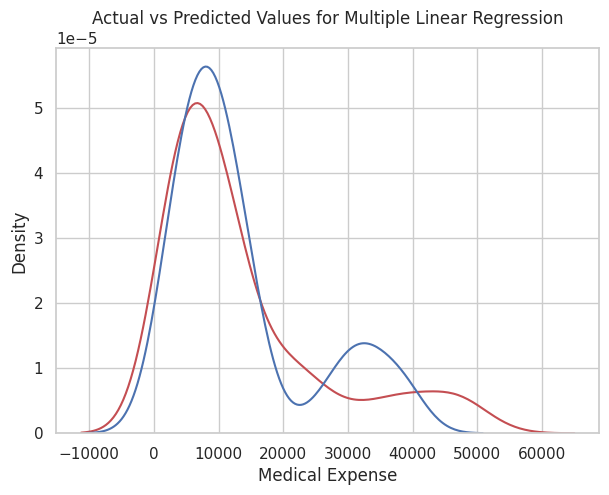

In [ ]:
plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Multiple Linear Regression')
plt.xlabel('Medical Expense')
plt.show()

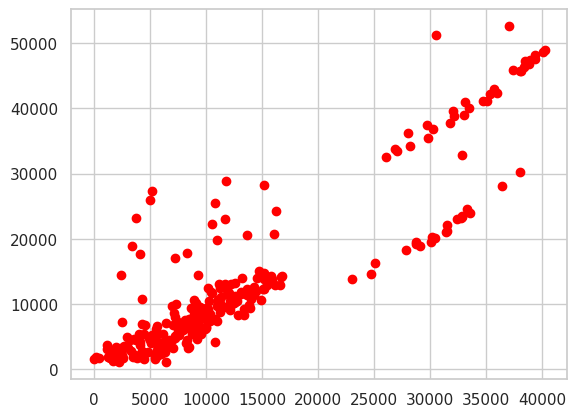

In [364]:
plt.scatter(y_pred,y_test,color='red')

In [ ]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 3930.3332739011394
MSE: 31845929.134159423
RMSE: 5643.2197488809015
R2 Score: 0.799874714544996


# **Decision Tree Regressor**

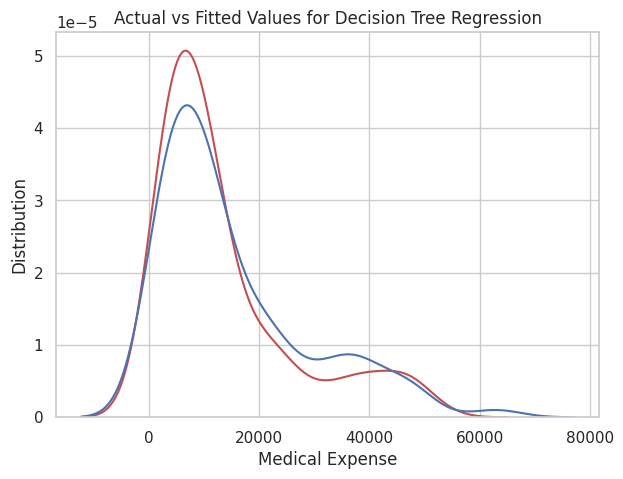

In [ ]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Decision Tree Regression')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

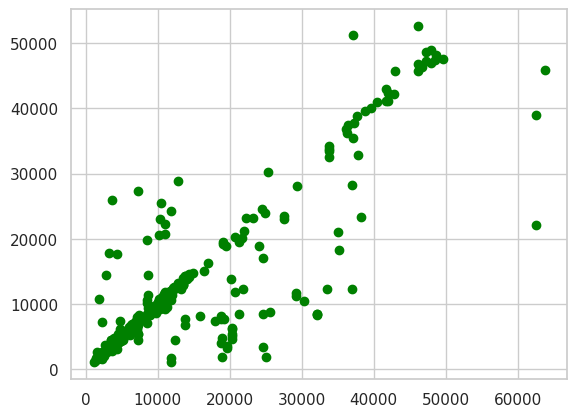

In [366]:
plt.scatter(dtree_pred,y_test,color='green')

In [ ]:
print('MAE:', mean_absolute_error(y_test, dtree_pred))
print('MSE:', mean_squared_error(y_test, dtree_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_pred)))
print('R2 Score:', r2_score(y_test, dtree_pred))


MAE: 3846.505898690298
MSE: 57949115.54298326
RMSE: 7612.431644552433
R2 Score: 0.6358378101939264


# **Random Forest Regressor**

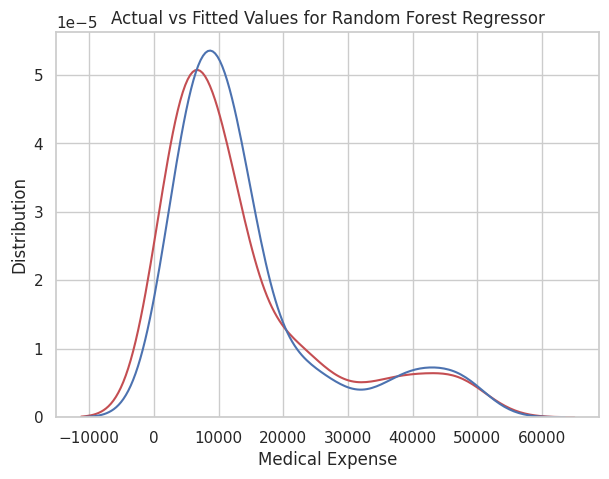

In [ ]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Random Forest Regressor')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

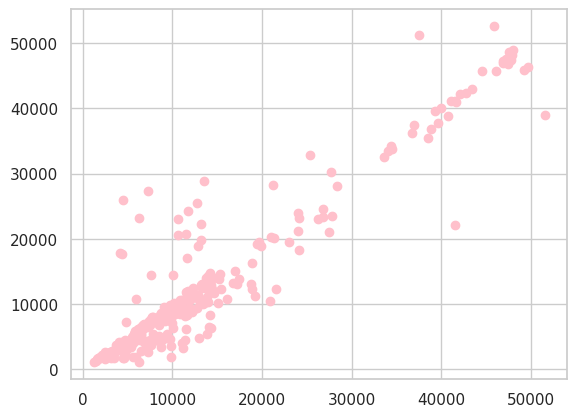

In [368]:
plt.scatter(rf_pred,y_test,color='pink')

In [ ]:
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('MSE:', mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('R2 Score:', r2_score(y_test, rf_pred))


MAE: 2678.0082491164794
MSE: 20211647.621899787
RMSE: 4495.736605040356
R2 Score: 0.8729865367467033


# **Conclusion**
From the above models, we can see that Decision Tree Regressor and Random Forest Regressor are giving the best results. But, Random Forest Regressor is giving the best results with the least RMSE value. Therefore, I will use Random Forest Regressor to predict the medical expense of patients.

Moreover, the medical expense of smokers is higher than that of non-smokers. The medical expense of patients with BMI greater than 30 is higher than that of patients with BMI less than 30. The medical expense of older patients is higher than that of younger patients.

Thus, from the overall analysis, we can conclude that the medical expense of patients depends on their age, BMI, smoking habits.